# GE 461 Introduction to Data Science 2024

# Project 4 – Fall Detection

### Görkem Kadir Solun 22003214

### Notes

Changing the random seeds affects the output.

You may need to update the data path.

You may need to update the figure sizes for pyplot.

### Imports


In [188]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### Load Data


In [189]:
# Load the data
# NOTE: This data may need to be configured to the correct path
directory = os.getcwd()
data_path = os.path.join(directory, "data\\falldetection_dataset.csv")

# Read the data with the first row as the data instead of the header
raw_data = pd.read_csv(data_path, header=None)

# Get the labels at the second column
data_labels = raw_data.iloc[:, 1]
data_unique_labels = data_labels.unique()
# Get the rest of the data by removing the first two columns
data_features = raw_data.drop(raw_data.columns[[0, 1]], axis=1)

print("Data shape: ", data_features.shape)
print("Labels shape: ", data_labels.shape)
print("Unique labels: ", data_unique_labels)

""" print("Data: ", data)
print("Labels: ", labels) """

Data shape:  (566, 306)
Labels shape:  (566,)
Unique labels:  ['F' 'NF']


' print("Data: ", data)\nprint("Labels: ", labels) '

## Part A

### PCA

Applied PCA to the data to reduce the dimensionality of the data to 2.


Principal Components shape:  (566, 2)
Explained Variance Ratios:  [0.75307248 0.0851159 ]
Eigenvalues:  [31464.17423647  3556.2334265 ]
Total Explained Variance Percentage:  83.81883815238376


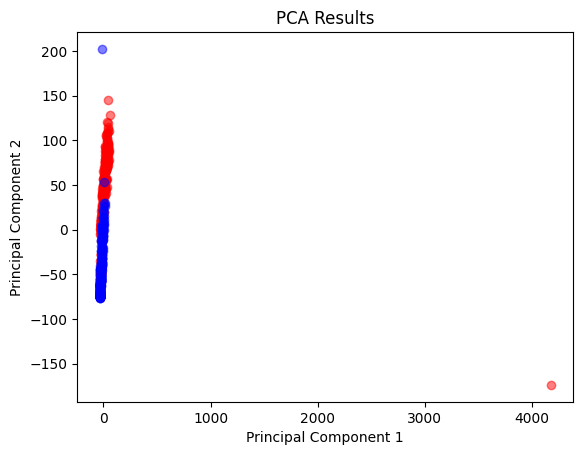

In [190]:
# Apply PCA to the data to reduce the dimensionality of the data to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_features)
explained_variance_ratios = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
total_explained_variance_percentage = sum(explained_variance_ratios) * 100

print("Principal Components shape: ", principal_components.shape)
print("Explained Variance Ratios: ", explained_variance_ratios)
print("Eigenvalues: ", eigenvalues)
print("Total Explained Variance Percentage: ", total_explained_variance_percentage)


# Function to plot the PCA results with the labels
def plot_pca_results(principal_components, labels, title):
    # Plot the PCA results
    plt.figure()
    # First scatter the fall points
    plt.scatter(
        principal_components[labels == "F", 0],
        principal_components[labels == "F", 1],
        c="r",
        label="Fall",
        alpha=0.5,
    )
    # Then scatter the Non-fall points
    plt.scatter(
        principal_components[labels == "NF", 0],
        principal_components[labels == "NF", 1],
        c="b",
        label="Non-Fall",
        alpha=0.5,
    )
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(title)
    plt.show()


# Plot the PCA results
plot_pca_results(principal_components, data_labels, "PCA Results")

Removed the two maximum outliers that can be detected from the previous plot.


Principal Components without outliers shape:  (564, 2)
Labels without outliers shape:  (564,)
Data without outliers shape:  (564, 306)


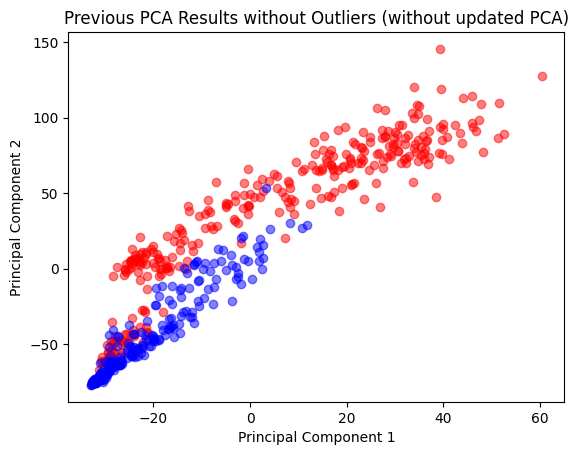

In [191]:
# Remove the first maximum outlier from the first principal component

max_index = np.argmax(principal_components[:, 0])
principal_components_no_outliers = np.delete(principal_components, max_index, axis=0)
labels_no_outlier = np.delete(data_labels, max_index, axis=0)
data_features_no_outlier = np.delete(data_features, max_index, axis=0)

# Remove the first maximum outlier from the second principal component
max_index = np.argmax(principal_components_no_outliers[:, 1])
principal_components_no_outliers = np.delete(
    principal_components_no_outliers, max_index, axis=0
)
labels_no_outlier = np.delete(labels_no_outlier, max_index, axis=0)
data_features_no_outlier = np.delete(data_features_no_outlier, max_index, axis=0)

print(
    "Principal Components without outliers shape: ",
    principal_components_no_outliers.shape,
)
print("Labels without outliers shape: ", labels_no_outlier.shape)
print("Data without outliers shape: ", data_features_no_outlier.shape)

# Plot the previous PCA results without the outliers
# NOTE: The outliers are removed from the data and labels, so we need to calculate the PCA again
# to get the principal components without the outliers, this is just for visualization purposes
plot_pca_results(
    principal_components_no_outliers,
    labels_no_outlier,
    "Previous PCA Results without Outliers (without updated PCA)",
)

Applied PCA again to data without outliers.


Principal Components without outliers shape:  (564, 2)
Explained Variance Ratios without outliers:  [0.40272259 0.18999792]
Eigenvalues without outliers:  [3962.56193172 1869.47175434]
Total Explained Variance Percentage without outliers:  59.272051045602524


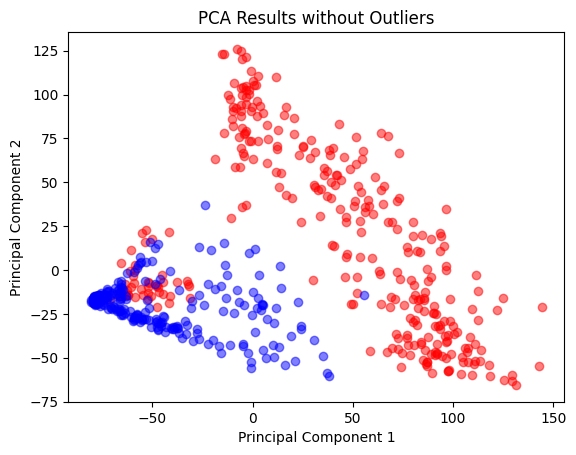

In [192]:
# Applay PCA to data withou outliers
pca_no_outliers = PCA(n_components=2)
principal_components_no_outliers = pca_no_outliers.fit_transform(
    data_features_no_outlier
)
explained_variance_ratios_no_outliers = pca_no_outliers.explained_variance_ratio_
eigenvalues_no_outliers = pca_no_outliers.explained_variance_
total_explained_variance_percentage_no_outliers = (
    sum(explained_variance_ratios_no_outliers) * 100
)

print(
    "Principal Components without outliers shape: ",
    principal_components_no_outliers.shape,
)
print(
    "Explained Variance Ratios without outliers: ",
    explained_variance_ratios_no_outliers,
)
print("Eigenvalues without outliers: ", eigenvalues_no_outliers)
print(
    "Total Explained Variance Percentage without outliers: ",
    total_explained_variance_percentage_no_outliers,
)

plot_pca_results(
    principal_components_no_outliers, labels_no_outlier, "PCA Results without Outliers"
)

Scaled the data with Min-Max scaling to normalize the data and get better results.
Transformed the labels to binary, F=1, NF=0.


In [193]:
# Scale the data with the MinMaxScaler to normalize the data
min_max_scaler = MinMaxScaler()
data_features_scaled = min_max_scaler.fit_transform(data_features_no_outlier)
# Transform the labels to binary, F=1, NF=0 for the binary classification in the future
data_labels_binary = np.where(labels_no_outlier == "F", 1, 0)

Applied PCA again to normalized data.


Principal Components normalized shape:  (564, 2)
Explained Variance Ratios normalized:  [0.2664839  0.22066081]
Eigenvalues normalized:  [2.288873   1.89529111]
Total Explained Variance Percentage normalized:  48.71447026228692


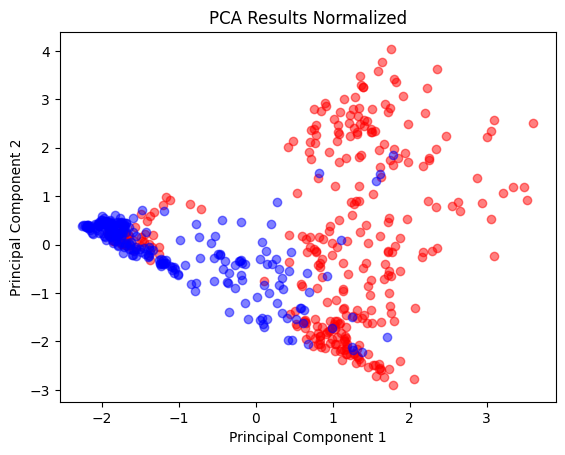

In [194]:
# Apply PCA again to data without outliers
pca_normalized = PCA(n_components=2)
principal_components_normalized = pca_normalized.fit_transform(data_features_scaled)
explained_variance_ratios_normalized = pca_normalized.explained_variance_ratio_
eigenvalues_normalized = pca_normalized.explained_variance_
total_explained_variance_percentage_normalized = (
    sum(explained_variance_ratios_normalized) * 100
)

print("Principal Components normalized shape: ", principal_components_normalized.shape)
print("Explained Variance Ratios normalized: ", explained_variance_ratios_normalized)
print("Eigenvalues normalized: ", eigenvalues_normalized)
print(
    "Total Explained Variance Percentage normalized: ",
    total_explained_variance_percentage_normalized,
)

plot_pca_results(
    principal_components_normalized, labels_no_outlier, "PCA Results Normalized"
)

Applied K-means


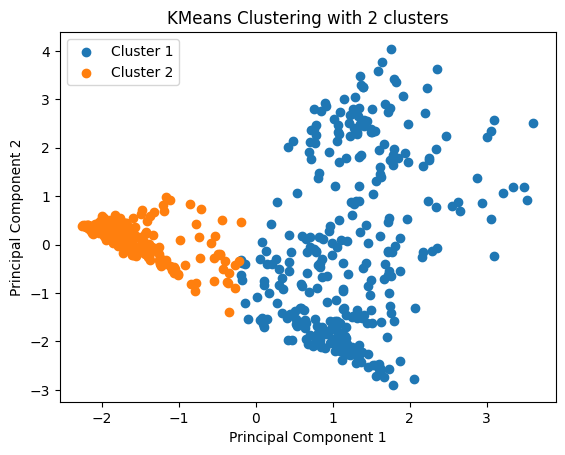

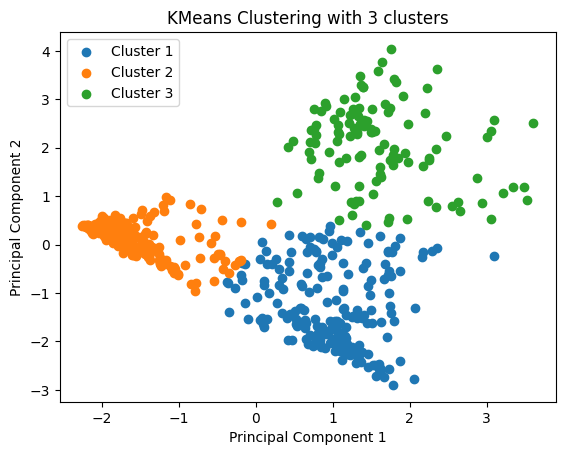

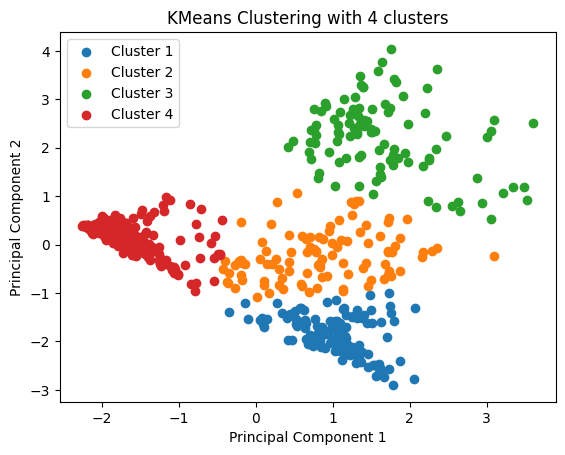

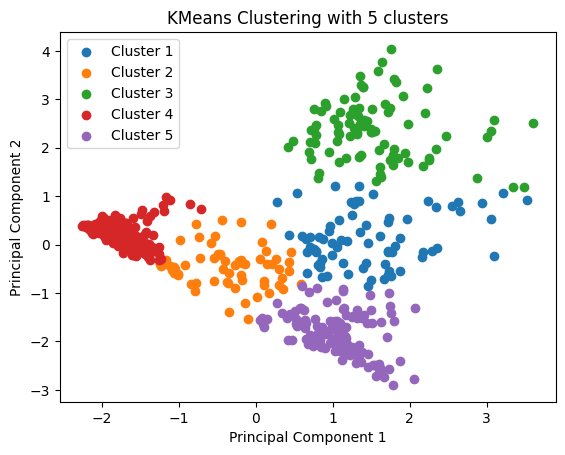

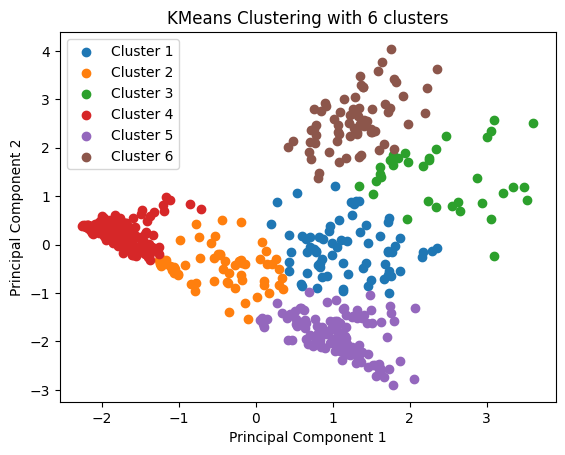

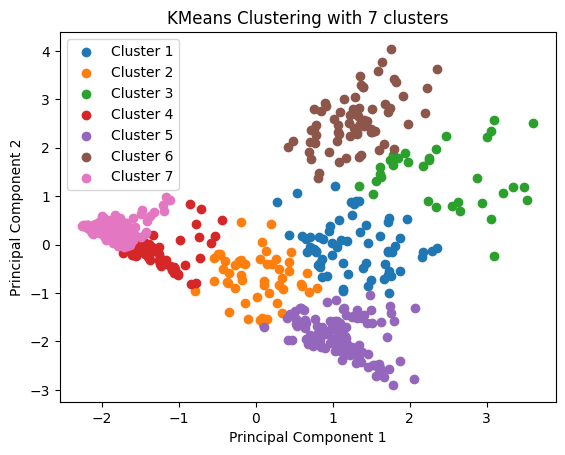

In [195]:
# Plotting function to plot the KMeans clustering results for different number of clusters
def plot_kmeans_results(principal_components, labels, n_clusters):
    plt.figure()
    for i in range(n_clusters):
        plt.scatter(
            principal_components[labels == i, 0],
            principal_components[labels == i, 1],
            label="Cluster " + str(i + 1),
        )
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("KMeans Clustering with " + str(n_clusters) + " clusters")
    plt.legend()
    plt.show()


# Apply KMeans clustering to the normalized data withe different number of clusters
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(principal_components_normalized)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plot_kmeans_results(principal_components_normalized, labels, n_clusters)